In [2]:
# Install first if needed:
# pip install xgboost lightgbm

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = load_wine()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("🔹 XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


🔹 XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [5]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
print("🔹 LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -0.908259
[LightGBM] [Info] Start training from score -1.293921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

c:\Users\tanma\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [6]:
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgb):.3f}")


XGBoost Accuracy: 1.000
LightGBM Accuracy: 0.981


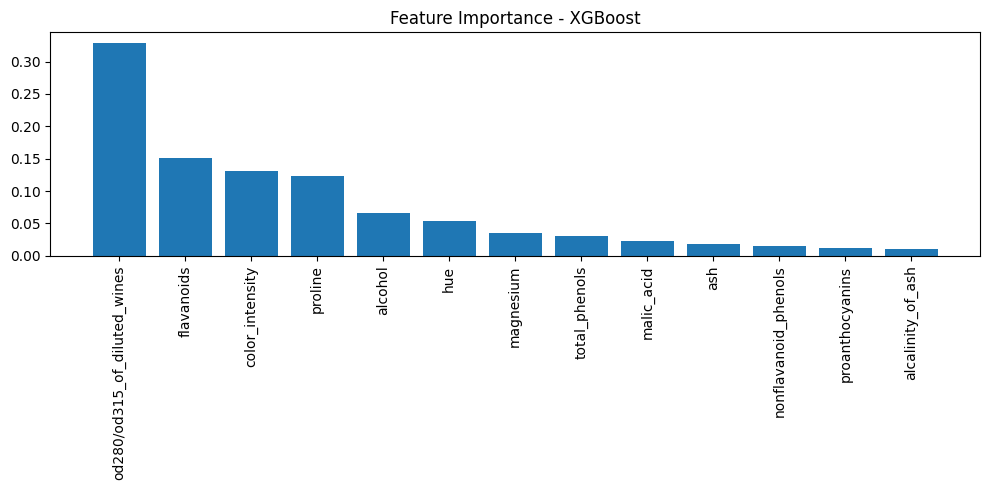

In [7]:
import numpy as np

plt.figure(figsize=(10,5))

# XGBoost feature importance
importances_xgb = xgb_model.feature_importances_
indices = np.argsort(importances_xgb)[::-1]

plt.bar(range(X.shape[1]), importances_xgb[indices])
plt.xticks(range(X.shape[1]), [data.feature_names[i] for i in indices], rotation=90)
plt.title("Feature Importance - XGBoost")
plt.tight_layout()
plt.show()


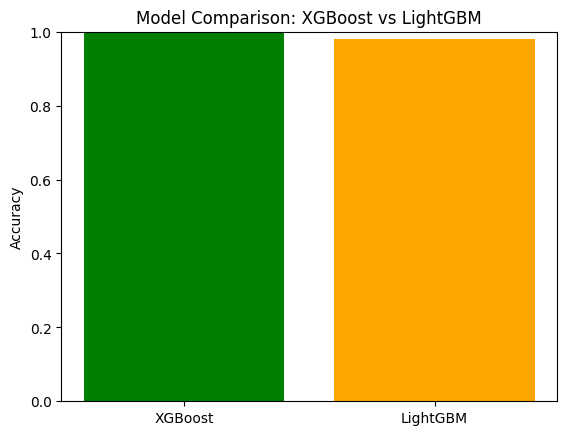

In [8]:
models = ['XGBoost', 'LightGBM']
accuracies = [
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_lgb)
]

plt.bar(models, accuracies, color=['green', 'orange'])
plt.title('Model Comparison: XGBoost vs LightGBM')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


| Model                          | When to Use                                     | Strength                 |
| ------------------------------ | ----------------------------------------------- | ------------------------ |
| **XGBoost**                    | Medium–large tabular datasets, mixed data types | Accuracy, regularization |
| **LightGBM**                   | Very large data, categorical features           | Speed, scalability       |
| **GradientBoosting (sklearn)** | Educational or small data                       | Simplicity               |
